<a href="https://colab.research.google.com/github/oldairjsilva/IGTI/blob/main/Plano_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol. Para isso, vamos seguir as etapas do processamento do Big Data

Coleta de dados(1) >> Preparação de dados(2) >> Análise de dados(3) >> Modo Analítico(4) >> Visualização(5)

### Coleta dos dados
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes.
Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv.

### Coletando dados de estados brasileiros

In [1]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo
estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding = 'latin-1')

In [2]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


### Coletando dados de clientes

In [22]:
clientes = pd.read_excel('amostra_dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


### Coletando dados das idades dos clientes

In [4]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding = 'latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


### Preparação dos dados
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Esssa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.


### Analisando as variáveis da base de dados

In [9]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        220 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [10]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,220.000000,225.000000,225.000000
mean,113.000000,142.018182,168.733333,13.711111
std,65.096083,30.985482,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,169.250000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [11]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [12]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [13]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### Analisando dados ausentes

In [14]:
# Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [15]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [16]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [18]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identificamos 5 valores ausentes na base de dados de clientes. Para esse caso, temos 3 opções para tratamento de dados numéricos.

1.   Eliminação dos registros
2.   Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores externos;
3.   Mediana dos pesos dos clientes. Realiza a mediana dos pesos. (medida que pega o valor central dos dados)






### Eliminando dados ausentes

In [19]:
# Dados ausentes
clientes.dropna(subset = ['peso'], inplace = True) # para eliminar o registro. Inplace = True significa que quer alterar os dados naquele dataframe

In [20]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [21]:
clientes.count()

id_cliente    220
peso          220
colesterol    220
genero        220
id_estado     220
dtype: int64

### Alterando os dados por outras medidas

In [23]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,220.000000,225.000000,225.000000
mean,113.000000,142.018182,168.733333,13.711111
std,65.096083,30.985482,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,169.250000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [24]:
# Realizando a média e mediana da variavel peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [25]:
# Verificando valores
print(f"O valor da média dos pesos é {media}\nO valor da mediana é {mediana}")

O valor da média dos pesos é 142.01818181818183
O valor da mediana é 138.5


In [26]:
# Fazendo arredondamento da variavel média
round(media, 2)

142.02

In [27]:
# Preencher valores ausentes pela média
clientes.peso.fillna(round(media, 2), inplace = True)

In [28]:
# Verifica se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [29]:
clientes.count()

id_cliente    225
peso          225
colesterol    225
genero        225
id_estado     225
dtype: int64

### Substituindo variável categórica
Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [30]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [31]:
estados.pais.fillna('Brasil', inplace = True)

In [32]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

### Analisando distribuição dos dados

In [34]:
import matplotlib.pyplot as plt

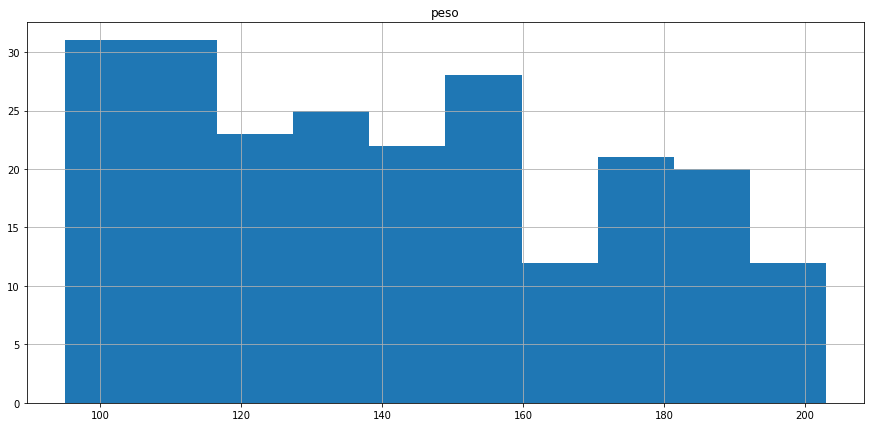

In [35]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

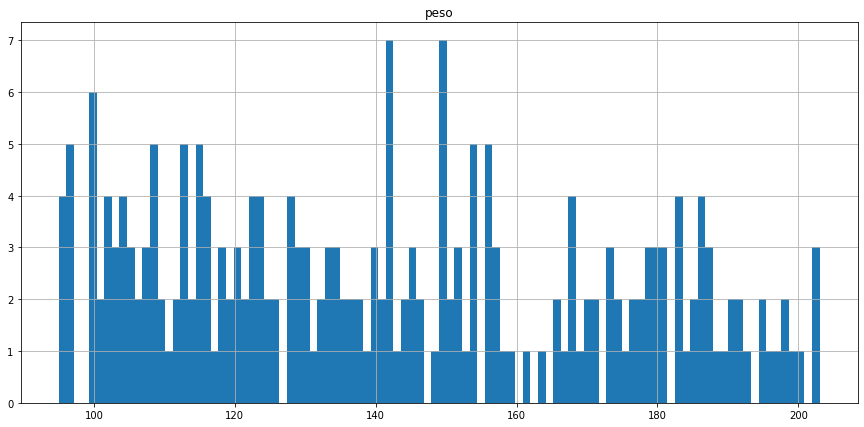

In [36]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

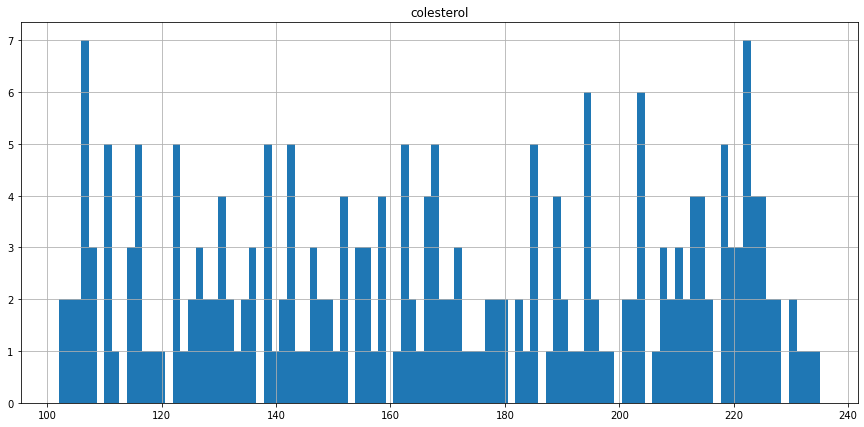

In [37]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)
plt.show()

In [38]:
# Criando um identificador para a variavel genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [39]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1
221,222,116.0,138,Feminino,15,0
222,223,144.0,169,Feminino,18,0
223,224,102.0,116,Masculino,6,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7991d9d90>]],
      dtype=object)

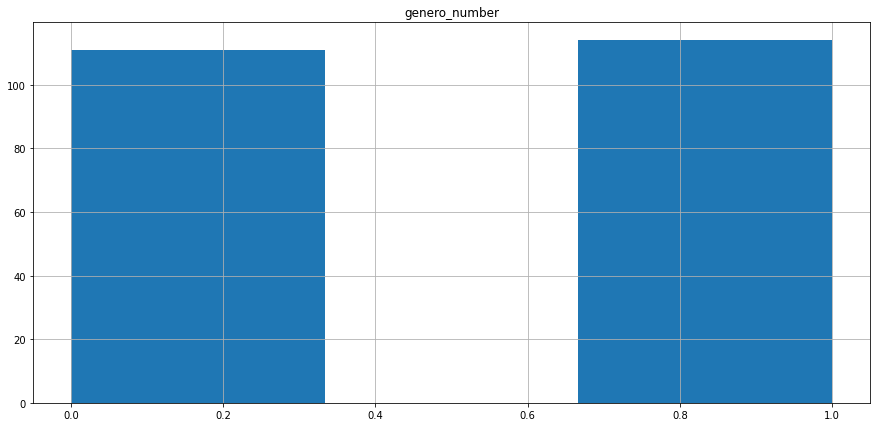

In [40]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

### Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [41]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [42]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [43]:
clientes_estados = pd.merge(clientes, estados, on = 'id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


In [44]:
# Realiza Junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on = 'id_cliente').sort_values('id_cliente')

In [45]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [46]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
223,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


### Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [47]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [48]:
# Alterando as linhas da variavel sigla_estado
base_completa.sigla_estado.str.upper()

0      RR
9      DF
21     AM
32     SC
39     SE
       ..
167    RN
126    PB
196    PI
77     CE
20     DF
Name: sigla_estado, Length: 225, dtype: object

In [49]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [50]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,RN,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,PB,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,PI,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,CE,Brasil,31


### Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de facilitar a visualização.

In [51]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
9,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
21,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
32,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
39,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
126,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
196,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
77,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


In [52]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop = True)

In [53]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
221,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
222,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
223,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil
